# Lending Club

#### Libraies

In [3]:
# Importing Library for Data Realated work
import pandas as pd 
import numpy as np

# Importing Graphical Ploting library for Data Visualiazation 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',150)
import warnings
warnings.filterwarnings('ignore')


#### Importing Data File

In [5]:
# low_memory=False helps to read the file in one go and not in chucks, 
# With in the data there exsits columns with mixed data type (dtype) lowering the perofomance.

loan_df = pd.read_csv(r"D:\ML&AI\Case_Study\Lending_club_study\loan\loan.csv", low_memory=False)

In [6]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Data Cleaning Mainly Dropping Columns which Have no Analysis Power

___Understanding the data Set___

In [9]:
loan_df.shape

(39717, 111)

In [10]:
loan_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

___Finding the percentage of the Null values and Sorting them (Percentage give a better understanding the count of null values)___

In [12]:
# Finding the percentage of the Null values and Sorting them (Percentage give a better understanding the count of null values)
missing_value_per = loan_df.isnull().mean()*100
result_desc = missing_value_per.sort_values(ascending = False)

In [13]:
result_desc

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

In [14]:
# Computing the count of columns where null value of the coulmn is equal to 100% 
(result_desc != 100).sum()

57

___Setting Null values threshold___

___Considering more than 40% null value as the cut off for dorpping columns in DataFrame___

In [16]:
# Threshold Setting
nullcol_thres = 0.4*len(loan_df)
null_col_head = [col for col in loan_df.columns if loan_df[col].isnull().sum()>=nullcol_thres]

In [17]:
# Dropping Columns
filtered_df = loan_df.drop(null_col_head, axis=1)

In [18]:
# Dropping these coloumns where from the above describe function 
# There is no comparable or catagorical data present whaich can be vaulabe for the analysis 
#  zip_code has disguised null values whihc dont have analys im pact thus droppping them 
# initial_list_status have the enetery as f which has no impact on analyss 
# Droping Desc as 30% of the values are null and within AND the url the data present with in the coulmn have no analysis power 
filtered_df.drop(columns=['desc','url','collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths',
                          'delinq_amnt','initial_list_status','id'], inplace = True)

___Analysing the dataframe after dropping the columns___

In [20]:
missing_value_per = filtered_df.isnull().mean()*100
result_desc = missing_value_per.sort_values(ascending = False)

In [21]:
result_desc

emp_title                  6.191303
emp_length                 2.706650
pub_rec_bankruptcies       1.754916
last_pymnt_d               0.178765
revol_util                 0.125891
tax_liens                  0.098195
title                      0.027696
last_credit_pull_d         0.005036
total_pymnt                0.000000
pub_rec                    0.000000
revol_bal                  0.000000
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_rec_int              0.000000
total_pymnt_inv            0.000000
total_rec_prncp            0.000000
inq_last_6mths             0.000000
total_rec_late_fee         0.000000
recoveries                 0.000000
collection_recovery_fee    0.000000
last_pymnt_amnt            0.000000
application_type           0.000000
open_acc                   0.000000
member_id                  0.000000
earliest_cr_line           0.000000
loan_amnt                  0.000000
funded_amnt                0

#### Changing the column in the Date Time Column 

In [23]:
date_coulms = filtered_df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']]
for col in date_coulms:
    filtered_df[col] = pd.to_datetime(filtered_df[col], format = '%b-%y',errors='coerce')

In [24]:
filtered_df[['earliest_cr_line','issue_d','last_pymnt_d','last_credit_pull_d']].head()

,earliest_cr_line,issue_d,last_pymnt_d,last_credit_pull_d
0,1985-01-01,2011-12-01,2015-01-01,2016-05-01
1,1999-04-01,2011-12-01,2013-04-01,2013-09-01
2,2001-11-01,2011-12-01,2014-06-01,2016-05-01
3,1996-02-01,2011-12-01,2015-01-01,2016-04-01
4,1996-01-01,2011-12-01,2016-05-01,2016-05-01


### Segmenting for easy Handling

#### Numerical columns

In [27]:
# Imputing the intrest Rate & revol_util by removing the % from the column
filtered_df['int_rate'] = filtered_df['int_rate'].str.replace('%','').astype(float).round(0)
filtered_df['revol_util'] = filtered_df['revol_util'].str.replace('%','').astype(float).round(0)
filtered_df[['int_rate','revol_util']]

,int_rate,revol_util
0,11.0,84.0
1,15.0,9.0
2,16.0,98.0
3,13.0,21.0
4,13.0,54.0
...,...,...
39712,8.0,13.0
39713,10.0,27.0
39714,8.0,19.0
39715,7.0,1.0


In [28]:
## Making 'member_id' as objects as the are identification numbers 
filtered_df['member_id'] = filtered_df['member_id'].astype('object')

In [29]:
# Fetching the head of the columns which are numerical
def num_col_value_c (df):
    numerical_columns = df.select_dtypes(include = ['float64','int64']).columns
    return numerical_columns

num_col = num_col_value_c(filtered_df)

In [30]:
filtered_df[num_col] = filtered_df[num_col].astype('float64')

In [31]:
# Rounding the Values 
filtered_df[num_col] = filtered_df[num_col].apply(lambda x: x.round(2))

In [32]:
num_col = num_col_value_c(filtered_df)

In [33]:
filtered_df[num_col] = filtered_df[num_col].apply(lambda col: col.fillna(col.median()))

In [34]:
filtered_df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  float64
 1   funded_amnt              39717 non-null  float64
 2   funded_amnt_inv          39717 non-null  float64
 3   int_rate                 39717 non-null  float64
 4   installment              39717 non-null  float64
 5   annual_inc               39717 non-null  float64
 6   dti                      39717 non-null  float64
 7   delinq_2yrs              39717 non-null  float64
 8   inq_last_6mths           39717 non-null  float64
 9   open_acc                 39717 non-null  float64
 10  pub_rec                  39717 non-null  float64
 11  revol_bal                39717 non-null  float64
 12  revol_util               39717 non-null  float64
 13  total_acc                39717 non-null  float64
 14  out_prncp             

#### String columns

In [36]:
# Fetching the head of the columns which are String
def str_col_value_c (df):
    string_coulmuns = df.select_dtypes(include = ['object']).columns
    return string_coulmuns

In [37]:
str_col = str_col_value_c(filtered_df)

___Object to Categorical___

In [39]:
filtered_df[str_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   member_id            39717 non-null  object
 1   term                 39717 non-null  object
 2   grade                39717 non-null  object
 3   sub_grade            39717 non-null  object
 4   emp_title            37258 non-null  object
 5   emp_length           38642 non-null  object
 6   home_ownership       39717 non-null  object
 7   verification_status  39717 non-null  object
 8   loan_status          39717 non-null  object
 9   pymnt_plan           39717 non-null  object
 10  purpose              39717 non-null  object
 11  title                39706 non-null  object
 12  zip_code             39717 non-null  object
 13  addr_state           39717 non-null  object
 14  application_type     39717 non-null  object
dtypes: object(15)
memory usage: 4.5+ MB


In [40]:
filtered_df[str_col].describe()

,member_id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,application_type
count,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39706,39717,39717,39717
unique,39717,2,7,35,28820,11,5,3,3,1,14,19615,823,50,1
top,1296599,36 months,B,B3,US Army,10+ years,RENT,Not Verified,Fully Paid,n,debt_consolidation,Debt Consolidation,100xx,CA,INDIVIDUAL
freq,1,29096,12020,2917,134,8879,18899,16921,32950,39717,18641,2184,597,7099,39717


In [41]:
# Converting object data cloumns into categorical data based on the obsereded value_counts
def convert_to_category(df, threshold=0.4):
    """
    Converts columns to 'category' type if unique values are less than a specified threshold (40% by default) of the total non-null values.

    Parameters:
        str_col : DataFrame --> The input DataFrame.
        threshold : float --> The ratio threshold to compare unique values to total count (default is 0.4).
        
    Returns: DataFrame --> Modified DataFrame with appropriate columns converted to 'category' dtype.
    """
    for col in df.columns:
            unique_count = df[col].nunique()
            total_count = df[col].count()
            
            # Calculate percentage of unique values compared to alll the data
            if total_count > 0:  # Avoid division by zero preventing error
                unique_ratio = unique_count / total_count

                # If the unique_ratio is below the threshold will convert to 'category'
                if unique_ratio < threshold:
                    df[col] = df[col].astype('category')
                    print(f"Converted column '{col}' to 'category' type")

    return df

# Apply the function to your DataFrame
filtered_df[str_col] = convert_to_category(filtered_df[str_col])


Converted column 'term' to 'category' type
Converted column 'grade' to 'category' type
Converted column 'sub_grade' to 'category' type
Converted column 'emp_length' to 'category' type
Converted column 'home_ownership' to 'category' type
Converted column 'verification_status' to 'category' type
Converted column 'loan_status' to 'category' type
Converted column 'pymnt_plan' to 'category' type
Converted column 'purpose' to 'category' type
Converted column 'zip_code' to 'category' type
Converted column 'addr_state' to 'category' type
Converted column 'application_type' to 'category' type


___Manupulating the title column as The type of loan can be a crusial data to be used___

In [43]:
str_col = str_col_value_c(filtered_df)

In [44]:
filtered_df[str_col].value_counts()

member_id  emp_title                    title             
70699      Rail Europe Group            Buying a painting     1
984045     Morgan Stanley               Personal Loan         1
984504     Oracle Corporation           10k Loan              1
984520     BioMed Realty Trust          Building a patio      1
984526     Florida Home Builders Assoc  Debt Consolidation    1
                                                             ..
726936     A Touch of Italy             Repairs               1
726947     University of Maryland       DebtFree              1
726958     meadwestvaco                 personal              1
726974     US NAVY                      2010                  1
1314167    Ryder                        bike                  1
Name: count, Length: 37249, dtype: int64

In [45]:
filtered_df['title'] = filtered_df['title'].str.lower()

In [46]:
filtered_df['title'].value_counts()

title
debt consolidation                3082
debt consolidation loan           1866
personal loan                      986
consolidation                      737
home improvement                   543
                                  ... 
bilco                                1
vacation load                        1
toyota celica                        1
borrowing to expand investment       1
jal loan                             1
Name: count, Length: 17674, dtype: int64

In [47]:
filtered_df['title'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: title
Non-Null Count  Dtype 
--------------  ----- 
39706 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


In [48]:
# Checking what type of data is present in the column 
#y = [x for x in filtered_df['title'].unique()]
#print("Type Of Loan Seen" , y)

In [49]:
filtered_df['title']

0                         computer
1                             bike
2             real estate business
3                         personel
4                         personal
                   ...            
39712             home improvement
39713    retiring credit card debt
39714       mba loan consolidation
39715                     jal loan
39716           consolidation loan
Name: title, Length: 39717, dtype: object

In [50]:
# After a look in the Data Desription title is The loan title provided by the borrower thus type of loan take 
# Consider the most common home, car, personal, land, gold, Consodaltion 
loan_types = ['home', 'car', 'personal', 'land', 'gold', 'consolidation', 'business', 'loan', 'consolidate', 'study',
              'wedding','debt','medical','motorcycle']

In [51]:
def loan_cat_title(x):
    if isinstance(x, str):
        for loan_type in loan_types:
            if loan_type in x:
                return loan_type.capitalize()
    return x

In [52]:
filtered_df['title'] = filtered_df['title'].apply(loan_cat_title)

In [53]:
# Im
# Identifing the data in the columns Whihc occur only once 
occur_1_time = filtered_df['title'].value_counts()[filtered_df['title'].value_counts() <= 10].index
occur_1_time

Index(['2010', 'bill payoff', 'free at last', 'new life', 'auto repair',
       'dental', 'payback', 'expenses', 'legal fees', 'consolodation',
       ...
       'creative cottage', 'journey', 'mr. three thousand', 'cc refi 2011',
       'kind-investment', 'get my life started ', 'coffee company expansion',
       'used harley', 'pay off high apr credit', 'tito5000'],
      dtype='object', name='title', length=8510)

In [54]:
mode_title = filtered_df['title'].mode()[0]
mode_title

'Consolidation'

In [55]:
filtered_df['title'] = filtered_df['title'].replace(occur_1_time,mode_title)

In [56]:
# Imputing the title colum with the mode value
filtered_df['title'].fillna(filtered_df['title'].mode()[0],inplace = True)

In [57]:
#filtered_df['title'].replace(['Car', 'Motorcycle'], 'Vehicle', inplace = True)
#filtered_df['title'].replace([Consolidation, Loan, Debt ], 'Vehicle', inplace = True)

In [58]:
def categorize_title(title):
    title = title.lower()  # Convert to lowercase for case-insensitive comparison
    if any(keyword in title for keyword in ['consolidation', 'consolidate', 'refinance', 'cc', 'payoff']):
        return 'Debt Consolidation'
    elif any(keyword in title for keyword in ['car', 'auto', 'motorcycle', 'truck', 'bike', 'vehicle']):
        return 'Vehicle Loan'
    elif any(keyword in title for keyword in ['home', 'house', 'remodel', 'roof', 'kitchen', 'improvement']):
        return 'Home Improvement'
    # Add more elif blocks for other categories...
    else:
        return 'Other'

# Apply the function to categorize titles
filtered_df['title'] = filtered_df['title'].apply(categorize_title)

In [59]:
filtered_df['title'].value_counts()

title
Debt Consolidation    19029
Other                 12960
Vehicle Loan           5648
Home Improvement       2080
Name: count, dtype: int64

In [60]:
# Imputing the emp_length colum with the mode value
filtered_df[str_col] = filtered_df[str_col].apply(lambda col: col.fillna(col.mode()[0]))

In [61]:
filtered_df[str_col]

,member_id,emp_title,title
0,1296599,US Army,Debt Consolidation
1,1314167,Ryder,Vehicle Loan
2,1313524,US Army,Other
3,1277178,AIR RESOURCES BOARD,Debt Consolidation
4,1311748,University Medical Group,Other
...,...,...,...
39712,92174,FiSite Research,Home Improvement
39713,90607,"Squarewave Solutions, Ltd.",Vehicle Loan
39714,90390,US Army,Debt Consolidation
39715,89243,US Army,Other


In [62]:
filtered_df['title'] = filtered_df['title'].astype('category')
filtered_df['member_id'] = filtered_df['member_id'].astype('object')

In [63]:
filtered_df[str_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   member_id  39717 non-null  object  
 1   emp_title  39717 non-null  object  
 2   title      39717 non-null  category
dtypes: category(1), object(2)
memory usage: 659.7+ KB


#### Date Time Columns

In [65]:
def date_col_value_c (df):
    dat_coulmuns = df.select_dtypes(include = ['datetime64']).columns
    return dat_coulmuns

In [66]:
date_col = date_col_value_c(filtered_df)

## Data Anylysis

In [195]:
''''
    'loan_amnt' -- > The Money lended to the customer Exposer to risk
    'int_rate' -- > impacts the prfotability or thr risk of the defaluter
    'installment' -- > must be affordable by borrorwe 
    'total_pymnt' -- > paid by the borrower 
    'recoveries' -- > recovered by default 
    'loan_status' -- > outcome of the loan 
'''

loan_info = ['loan_amnt', 'int_rate', 'installment', 'total_pymnt', 'recoveries']

In [139]:
num_col = num_col_value_c(filtered_df)
str_col = str_col_value_c(filtered_df)
date_col = date_col_value_c(filtered_df)

In [141]:
filtered_df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies,tax_liens
member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1296599,5000.0,5000.0,4975.0,36 months,11.0,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,Debt Consolidation,860xx,AZ,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648.0,84.0,9.0,0.0,0.0,5863.16,5833.84,5000.00,863.16,0.0,0.00,0.00,2015-01-01,171.62,2016-05-01,INDIVIDUAL,0.0,0.0
1314167,2500.0,2500.0,2500.0,60 months,15.0,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,Vehicle Loan,309xx,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687.0,9.0,4.0,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.11,2013-04-01,119.66,2013-09-01,INDIVIDUAL,0.0,0.0


In [143]:
filtered_df.shape

(39717, 44)

In [145]:
filtered_df.describe(include = 'all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,39717.000000,39717,39717.000000,39717.000000,39717,39717,39717,38642,39717,3.971700e+04,39717,39717,39717,39717,39717,39717,39717,39717,39717.000000,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,39715,39717,39717.000000,39717.0
unique,NaN,NaN,NaN,2,NaN,NaN,7,35,28820,11,5,NaN,3,NaN,3,1,14,4,823,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,NaN,Fully Paid,n,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN
freq,NaN,NaN,NaN,29096,NaN,NaN,12020,2917,2593,8879,18899,NaN,16921,NaN,32950,39717,18641,19029,597,7099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39717,NaN,NaN
mean,11219.443815,10947.713196,10397.448876,NaN,12.011229,324.561922,NaN,NaN,NaN,NaN,NaN,6.896893e+04,NaN,2010-11-03 23:26:45.166553344,NaN,NaN,NaN,NaN,NaN,NaN,13.315130,0.146512,1997-04-11 16:09:21.250849664,0.869200,9.294408,0.055065,13382.528086,48.833724,22.088828,51.227887,50.989768,12153.596553,11567.149118,9793.348813,2263.663172,1.363019,95.221624,12.406110,2013-04-10 05:32:22.652474368,2678.826162,2014-09-07 19:16:08.007050496,NaN,0.042501,0.0
min,500.000000,500.000000,0.000000,NaN,5.000000,15.690000,NaN,NaN,NaN,NaN,NaN,4.000000e+03,NaN,2007-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1969-02-01 00:00:00,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008-01-01 00:00:00,0.000000,2007-05-01 00:00:00,NaN,0.000000,0.0
25%,5500.000000,5400.000000,5000.000000,NaN,9.000000,167.020000,NaN,NaN,NaN,NaN,NaN,4.040400e+04,NaN,2010-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,8.170000,0.000000,1993-12-01 00:00:00,0.000000,6.000000,0.000000,3703.000000,26.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,2012-04-01 00:00:00,218.680000,2013-06-01 00:00:00,NaN,0.000000,0.0
50%,10000.000000,9600.000000,8975.000000,NaN,12.000000,280.220000,NaN,NaN,NaN,NaN,NaN,5.900000e+04,NaN,2011-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,13.400000,0.000000,1998-05-01 00:00:00,1.000000,9.000000,0.000000,8850.000000,49.000000,20.000000,0.000000,0.000000,9899.640000,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,2013-04-01 00:00:00,546.140000,2015-03-01 00:00:00,NaN,0.000000,0.0
75%,15000.000000,15000.000000,14400.000000,NaN,15.000000,430.780000,NaN,NaN,NaN,NaN,NaN,8.230000e+04,NaN,2011-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,18.600000,0.000000,2001-09-01 00:00:00,1.000000,12.000000,0.000000,17058.000000,72.000000,29.000000,0.000000,0.000000,16534.430000,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,2014-06-01 00:00:00,3293.160000,2016-05-01 00:00:00,NaN,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,NaN,25.000000,1305.190000,NaN,NaN,NaN,NaN,NaN,6.000000e+06,NaN,2011-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,29.990000,11.000000,2068-12-01 00:00:00,8.000000,44.000000,4.000000,149588.000000,100.000000,90.000000,6311.470000,6307.370000,58563.680000,58563.680000,35000.020000,23563.680000,180.200000,2

In [ ]:
# loan_status

In [147]:
filtered_df['loan_status']

member_id
1296599     Fully Paid
1314167    Charged Off
1313524     Fully Paid
1277178     Fully Paid
1311748        Current
              ...     
92174       Fully Paid
90607       Fully Paid
90390       Fully Paid
89243       Fully Paid
86999       Fully Paid
Name: loan_status, Length: 39717, dtype: category
Categories (3, object): ['Charged Off', 'Current', 'Fully Paid']

In [185]:
filtered_df.groupby( by = 'loan_status')[num_col].mean()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,tax_liens
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,12104.385108,11753.398792,10864.521299,13.797228,336.175006,62427.298034,14.000624,0.170606,1.058113,9.178070,0.084770,13514.243647,55.557668,21.427581,0.000000,0.000000,6838.030942,6367.470474,3967.177947,2194.459385,4.291717,672.101873,87.565929,326.020833,0.065754,0.0
Current,17053.991228,16485.701754,16318.265202,14.987719,395.476061,75430.665105,14.750009,0.141228,0.783333,9.936842,0.042982,16530.893860,53.208772,23.313158,1784.752632,1776.456684,21852.875561,21582.041684,14700.949465,7150.753254,1.172904,0.000000,0.000000,397.468491,0.035965,0.0
Fully Paid,10866.455994,10618.520486,10112.837431,11.603247,320.125232,69862.503328,13.148421,0.142580,0.839909,9.292049,0.050410,13251.107739,47.534082,22.159393,0.000000,0.000000,12725.781975,12108.624511,10618.514176,2106.398438,0.869452,0.000000,0.000000,3159.554033,0.038756,0.0


In [157]:
# Focusing on loan_status where is Current
current_loan = filtered_df[filtered_df['loan_status'] == 'Current']

In [173]:
loan_info

['loan_amnt',
 'int_rate',
 'installment',
 'total_pymnt',
 'recoveries',
 'loan_status']

In [207]:
current_loan[loan_info].describe()

,loan_amnt,int_rate,installment,total_pymnt,recoveries
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.0
mean,17053.991228,14.987719,395.476061,21852.875561,0.0
std,8651.052316,3.610276,204.492991,11192.456060,0.0
min,1000.000000,6.000000,21.740000,1236.180000,0.0
25%,12000.000000,12.000000,258.470000,14348.472500,0.0
50%,15825.000000,15.000000,368.190000,20370.955000,0.0
75%,23000.000000,18.000000,519.725000,28795.752500,0.0
max,35000.000000,25.000000,981.450000,54427.230000,0.0


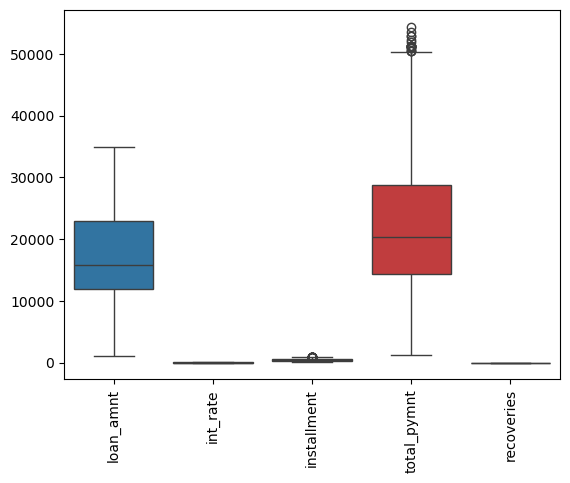

In [209]:
sns.boxplot(current_loan[loan_info])
plt.xticks(rotation = 90)
plt.show()

### Standardizing Numerical Columns

In [186]:
num_col = num_col_value_c(filtered_df)

In [188]:
num_col

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [190]:
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'tax_liens']

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [192]:
filtered_df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 39717 entries, 1296599 to 86999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  float64
 1   funded_amnt              39717 non-null  float64
 2   funded_amnt_inv          39717 non-null  float64
 3   int_rate                 39717 non-null  float64
 4   installment              39717 non-null  float64
 5   annual_inc               39717 non-null  float64
 6   dti                      39717 non-null  float64
 7   delinq_2yrs              39717 non-null  float64
 8   inq_last_6mths           39717 non-null  float64
 9   open_acc                 39717 non-null  float64
 10  pub_rec                  39717 non-null  float64
 11  revol_bal                39717 non-null  float64
 12  revol_util               39717 non-null  float64
 13  total_acc                39717 non-null  float64
 14  out_prncp            

In [194]:
filtered_df[num_col].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.0
mean,11219.443815,10947.713196,10397.448876,12.011229,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,48.833724,22.088828,51.227887,50.989768,12153.596553,11567.149118,9793.348813,2263.663172,1.363019,95.221624,12.406110,2678.826162,0.042501,0.0
std,7456.670694,7187.238670,7128.450440,3.717187,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,28.321283,11.401709,375.172839,373.824457,9042.040767,8942.672613,7065.522127,2608.111964,7.289993,688.744771,148.671595,4447.136012,0.202603,0.0
min,500.000000,500.000000,0.000000,5.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,5500.000000,5400.000000,5000.000000,9.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,26.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000,0.0
50%,10000.000000,9600.000000,8975.000000,12.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,49.000000,20.000000,0.000000,0.000000,9899.640000,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000,0.0
75%,15000.000000,15000.000000,14400.000000,15.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,72.000000,29.000000,0.000000,0.000000,16534.430000,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,25.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,100.000000,90.000000,6311.470000,6307.370000,58563.680000,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000,0.0


In [195]:
filtered_df[num_col].isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
int_rate                   0
installment                0
annual_inc                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
pub_rec_bankruptcies       0
tax_liens                  0
dtype: int64

___Handeling the numerical Columns___

#### Handeling ouiers 

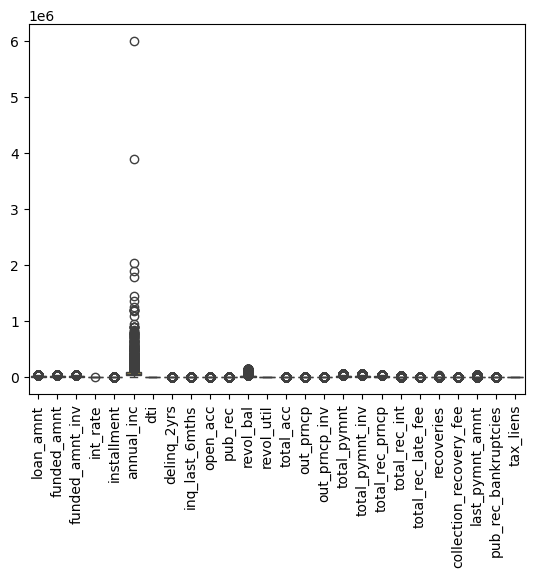

In [226]:
sns.boxplot(filtered_df[num_col])
plt.xticks(rotation = 90)
plt.show()

Standardization rescales the data so that it has a mean of 0 and a standard deviation of 1. 

Standardization (Z-score normalization)

In [200]:
filtered_df[num_col].columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [201]:
# z - Score
#z_score = (filtered_df[num_col]-filtered_df[num_col].mean())/filtered_df[num_col].std()
#std_df = filtered_df[(z_score>3).any(axis=1)]

# Calculate z-scores for each numeric column
#z_score = (filtered_df[num_col] - filtered_df[num_col].mean()) / filtered_df[num_col].std()

# Filter rows where any z-score in any numeric column is greater than 3
#filtered_outliers = filtered_df[(z_score > 3).any(axis=1)]

#filtered_outliers

<Axes: ylabel='annual_inc'>

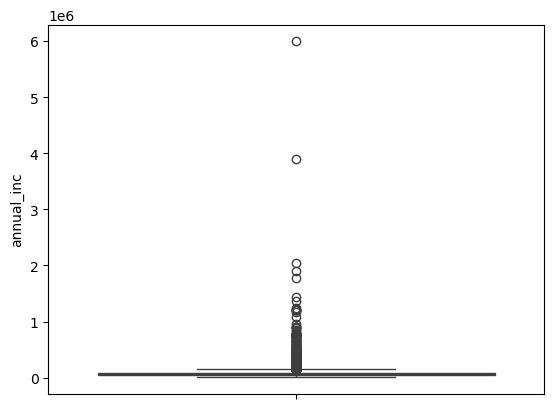

In [202]:
sns.boxplot(filtered_df['annual_inc'])

In [203]:
### IQR Scaling
Q1 = filtered_df[num_col].quantile(0.25)
Q3 = filtered_df[num_col].quantile(0.75)
IQR = Q3-Q1
UR = Q3 + 1.5*IQR
LR = Q1 - 1.5*IQR

Outliers_IQR = (filtered_df[num_col] < LR) | (filtered_df[num_col] > UR)
std_df = filtered_df[~Outliers_IQR.any(axis=1)]

In [204]:
std_df.shape

(19267, 44)

In [205]:
filtered_df.shape

(39717, 44)

<Axes: ylabel='annual_inc'>

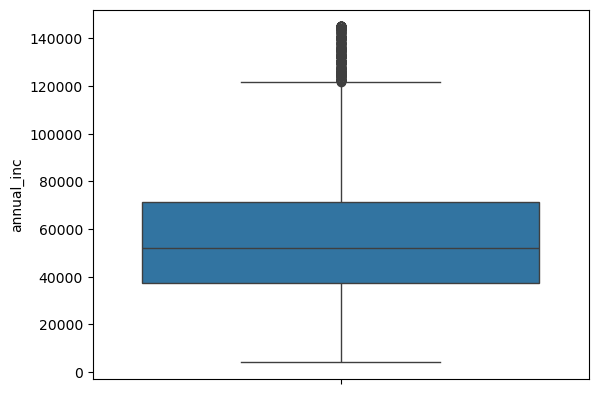

In [206]:
sns.boxplot(std_df['annual_inc'])

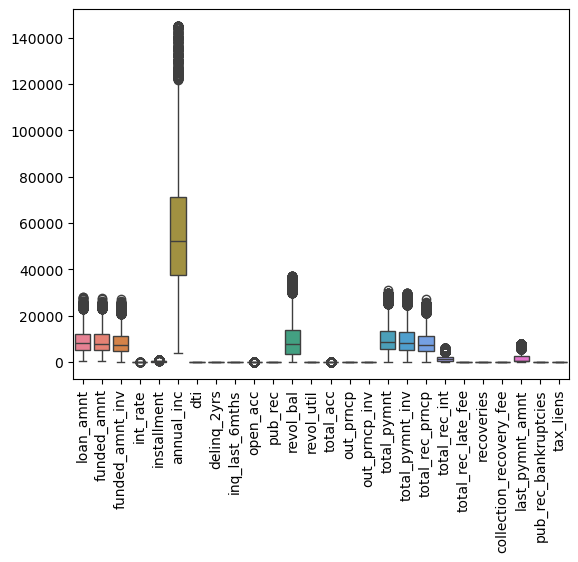

In [228]:
sns.boxplot(std_df[num_col])
plt.xticks(rotation = 90)
plt.show()

### Loan Information

In [238]:
loan_info

,loan_amnt,int_rate,installment,total_pymnt,recoveries,loan_status
member_id,,,,,,
1296599,5000.0,11.0,162.87,5863.16,0.0,Fully Paid
1313524,2400.0,16.0,84.33,3005.67,0.0,Fully Paid
1304742,7000.0,16.0,170.08,10110.84,0.0,Fully Paid
1288686,3000.0,19.0,109.43,3939.14,0.0,Fully Paid
1305201,6500.0,15.0,153.45,7678.02,0.0,Fully Paid
...,...,...,...,...,...,...
93057,5000.0,7.0,155.38,5593.63,0.0,Fully Paid
92542,5000.0,10.0,161.25,5804.73,0.0,Fully Paid
92502,5000.0,7.0,155.38,5593.63,0.0,Fully Paid


In [244]:
filtered_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [151]:
filtered_df[num_col]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,tax_liens
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,11.0,162.87,24000.0,27.65,0,1,3,0,13648,84.0,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,0.0
1077430,1314167,2500,2500,2500.0,15.0,59.83,30000.0,1.00,0,5,3,0,1687,9.0,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0
1077175,1313524,2400,2400,2400.0,16.0,84.33,12252.0,8.72,0,2,2,0,2956,98.0,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,0.0
1076863,1277178,10000,10000,10000.0,13.0,339.31,49200.0,20.00,0,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,0.0
1075358,1311748,3000,3000,3000.0,13.0,67.79,80000.0,17.94,0,0,15,0,27783,54.0,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92187,92174,2500,2500,1075.0,8.0,78.42,110000.0,11.33,0,0,13,0,7274,13.0,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,80.90,NaN,NaN
90665,90607,8500,8500,875.0,10.0,275.38,18000.0,6.40,1,1,6,0,8847,27.0,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,281.94,NaN,NaN
90395,90390,5000,5000,1325.0,8.0,156.84,100000.0,2.30,0,0,11,0,9698,19.0,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,0.00,NaN,NaN


In [77]:
# Write value counts to a text file
with open(r'D:\ML&AI\Case_Study\Lending_club_study\value_counts_summary.txt', 'w') as file:
    for col in filtered_df.columns:
        file.write(f"Value counts for column: {col}\n")
        file.write(f"{filtered_df[col].value_counts()}\n\n")


In [78]:
missing_value_per = filtered_df.isnull().mean()*100
result_desc = missing_value_per.sort_values(ascending = False)

In [79]:
result_desc[result_desc > 0]

emp_length            2.706650
last_pymnt_d          0.178765
last_credit_pull_d    0.005036
dtype: float64

In [80]:
filtered_df['emp_title'].mode()[0]

KeyError: 'emp_title'

In [ ]:
filtered_df['emp_title'].describe()

In [ ]:
filtered_df['emp_length'].mode()[0]